# Airline On-Time Performance Data
## by Barnabas Ifebude

## Introduction
The Airline On-Time Performance dataset reports commercial flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from October 1987 to April 2008.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import seaborn as sns
from zipfile import ZipFile
import matplotlib.pyplot as plt

%matplotlib inline

Because I couldn't get a unique link to programmatically download the dataset, to replicate this, you will have mannual download the zipped filed [here]((https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7)) and place it in the *datasets* directory.


In [2]:
# Extract all files from the zipped file.
zipped_file = 'datasets/dataverse_files.zip'
path = 'datasets/data'

with ZipFile(zipped_file) as zf:
    zf.extractall(path)

In [3]:
# In the first attempt to load all the data in the dataset into a dataframe, the kernel got frozen
# df = pd.DataFrame()

# for file in files:
#     df_in = minimize_memory_usage(pd.read_csv(path + '/' + file, compression='bz2', encoding='ISO-8859-1'), file)
#     df = pd.concat([df, df_in])

### Loading Data into a Dataframe

Due to the size of the dataset, loading the dataset into a pandas dataframe at once failed. So, an alternative approach was used, by first loading the data into a sqlite database and then loading need data into a dataframe on-the-fly.

In the next few cells below, are functions to create and alter database tables, read csv files into the database tables, and load data into a dataframe from sql queries.

In [4]:
# Import functions needed for data processing
%run functions.py

In [5]:
# Call function to create flights, airports, carriers and plane_data tables 
create_tables()

# Call function to read csv files and insert into the database tables
read_data()

# Call function to add a computed date column to the flights table
add_date_column()

/Users/cibsmart/codes/ds/udacity-alx/03_visualization/project/functions.py:184: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('{}/{}'.format(path, file),


### What is the structure of your dataset?

There are 118,914,458 records in dataset with 29 features. The table below shows a description of each feature according to [Data Expo 2009: Airline on time data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7).


| | Name | Description
|-|:------|:------------
|1| Year  | 1987 - 2008
|2| Month | 1 - 12 
|3| DayofMonth| 1 - 31 
|4| DayOfWeek | 1 (Monday) - 7 (Sunday) 
|5| DepTime| actual departure time (local, hhm m) 
|6| CRSDepTime| scheduled departure time (local, hhmm) 
|7| ArrTime| actual arrival time (local, hhmm) 
|8| CRSArrTime| scheduled arrival time (local, hhmm) 
|9| UniqueCarrier| unique carrier code 
|10| FlightNum| flight number 
|11| TailNum| plane tail number 
|12| ActualElapsedTime| in minutes 
|13| CRSElapsedTime| in minutes 
|14| AirTime| in minutes 
|15| ArrDelay| arrival delay, in minutes 
|16| DepDelay| departure delay, in minutes 
|17| Origin| origin IATA airport code 
|18| Dest| des tination IATA airport code 
|19| Distance| in miles 
|20| TaxiIn| taxi in time, in minutes 
|21| TaxiOut| taxi out time in minutes 
|22| Cancelled| was the flight cancelled? 
|23| CancellationCode| reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
|24| Diverted| 1 = yes, 0 = no 
|25| CarrierDelay| in minutes 
|26| WeatherDelay| in minutes 
|27| NASDelay| in minutes 
|28| SecurityDelay| in minutes 
|29| LateAircraftDelay| in minutes

### What is/are the main feature(s) of interest in your dataset?

In this analysis, I am most interested in identifying trends in flight and airport delays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

On the one hand, I expect that the airports will have a strong effect on departure deplays: busy airport might experience higher percentage of airport delays. On the other hand the airlines will have strong effect on arrival delays: tight schedules by airlines or airlines with so many flights per day might experience higher percentage of flight delays.

> According to [Cirium Aviation Analytics](https://www.cirium.com/thoughtcloud/most-on-time-airlines-and-airports-of-2022-cirium) – **an on-time flight is defined as a flight that arrives within 14 minutes of the schedule gate arrival. For an airport it is defined as departing within 16 minutes of its scheduled departure.**

## Univariate Exploration

Taking a loot first at the distribution of the main variables of interest: arr_delay and dep_delay

#### Distribution of flight delays

In [6]:
# Query to load arr_delay into a dataframe
query = """
    SELECT arr_delay 
    FROM flights 
    WHERE arr_delay IS NOT NULL"""

df = query_to_df(query, optimize=True)

Memory usage before optimization 1.73 GB
Memory usage after optimization 1.08 GB
Total Run Time: 2 minutes


In [7]:
df.head()

,arr_delay
0,23
1,14
2,29
3,-2
4,33


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116411532 entries, 0 to 1411531
Data columns (total 1 columns):
 #   Column     Dtype
---  ------     -----
 0   arr_delay  int16
dtypes: int16(1)
memory usage: 1.1 GB


In [9]:
df.describe()

,arr_delay
count,1.164115e+08
mean,7.048319e+00
std,3.043998e+01
min,-1.437000e+03
25%,-7.000000e+00
50%,0.000000e+00
75%,1.100000e+01
max,2.598000e+03


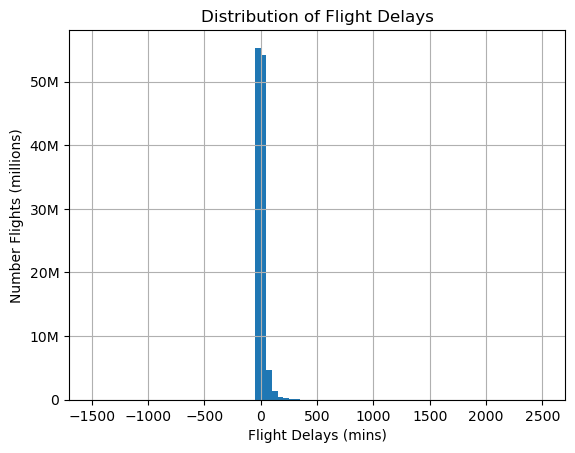

In [10]:
bins = np.arange(-1500, 2500 + 50, 50)
df.arr_delay.hist(bins=bins)
plt.title('Distribution of Flight Delays')
plt.xlabel('Flight Delays (mins)')
plt.ylabel('Number Flights (millions)')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000, 50000000], ['0', '10M', '20M', '30M', '40M', '50M']);

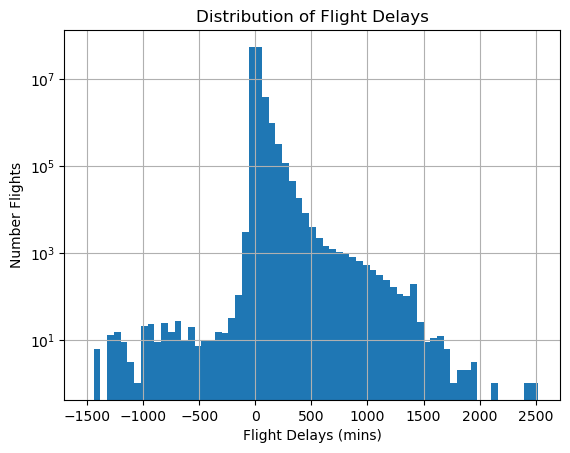

In [11]:
# Most the flight delays were between -50 and 50, 
# making most of the bins invisible, let apply a log scale on the y-axis
bins = np.arange(-1500, 2500 + 60, 60)
df.arr_delay.hist(bins=bins)
plt.title('Distribution of Flight Delays')
plt.xlabel('Flight Delays (mins)')
plt.ylabel('Number Flights')
plt.yscale('log')
plt.yticks([10, 1000, 100000, 10000000], ['10', '1K', '100K', '10M']);

The distribution of flight delay in minutes is unimodal with a peak between -50 and 50 minutes. More than 90% of flight arrived between -50 and 50 minutes of the schedule time.

Next we will look at the distribution of departure (airport) delays.

#### Distribution of airport delays

In [12]:
# Query to load arr_delay into a dataframe
query = """
    SELECT dep_delay 
    FROM flights 
    WHERE dep_delay IS NOT NULL"""

df = query_to_df(query, optimize=True)

Memory usage before optimization 1.74 GB
Memory usage after optimization 1.09 GB
Total Run Time: 2 minutes


In [13]:
df.head()

,dep_delay
0,11
1,-1
2,11
3,-1
4,19


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116684126 entries, 0 to 1684125
Data columns (total 1 columns):
 #   Column     Dtype
---  ------     -----
 0   dep_delay  int16
dtypes: int16(1)
memory usage: 1.1 GB


In [15]:
df.describe()

,dep_delay
count,1.166841e+08
mean,8.129630e+00
std,2.824205e+01
min,-1.410000e+03
25%,-2.000000e+00
50%,0.000000e+00
75%,6.000000e+00
max,2.601000e+03


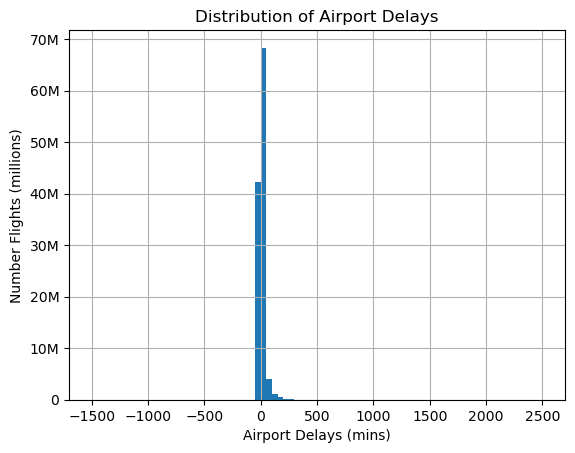

In [16]:
bins = np.arange(-1500, 2500 + 50, 50)
df.dep_delay.hist(bins=bins)
plt.title('Distribution of Airport Delays')
plt.xlabel('Airport Delays (mins)')
plt.ylabel('Number Flights (millions)')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000], ['0', '10M', '20M', '30M', '40M', '50M', '60M', '70M']);

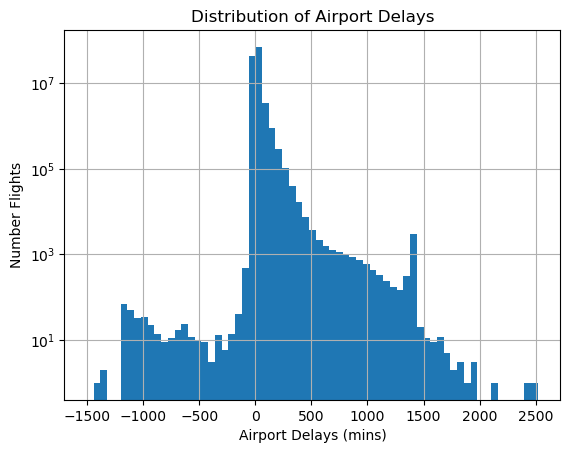

In [17]:
# Most the airport delays were between -50 and 50 just like the flight delays, 
# making most of the bins invisible, let apply a log scale on the y-axis
bins = np.arange(-1500, 2500 + 60, 60)
df.dep_delay.hist(bins=bins)
plt.title('Distribution of Airport Delays')
plt.xlabel('Airport Delays (mins)')
plt.ylabel('Number Flights')
plt.yscale('log')
plt.yticks([10, 1000, 100000, 10000000], ['10', '1K', '100K', '10M']);

Just like the distribution of flight delays, the distribution of airport delays is unimodal with a peak between -50 and 50 minutes. More than 90% of flights departed from the airport between -50 and 50 minutes of the scheduled departure.

Next we will look at the number of flights per airline.

#### Yearly number of flights 

In [18]:
query = """
    SELECT year, COUNT(*) num_flights
    FROM flights
    GROUP BY year"""

flights_yearly = query_to_df(query)

Total Run Time: 1 minutes


In [19]:
flights_yearly

,year,num_flights
0,1987,1311826
1,1988,5202096
2,1989,5041200
3,1990,5270893
4,1991,5076925
5,1992,5092157
6,1993,5070501
7,1994,5180048
8,1995,5327435
9,1996,5351983


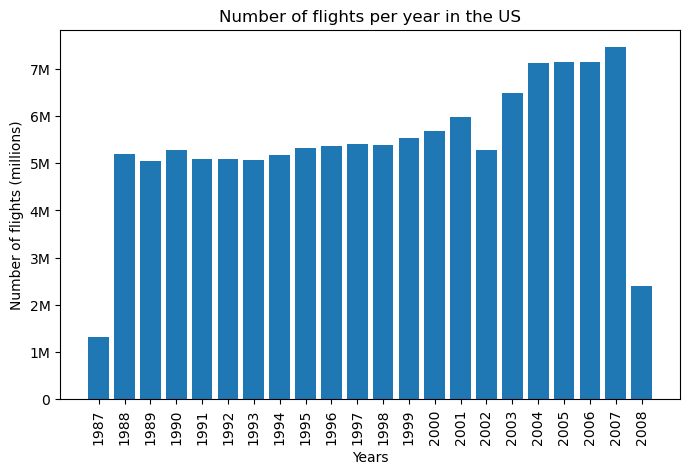

In [20]:
#plt.figure(figsize((6.4, 4.8))) default
plt.figure(figsize=(8, 4.8))
plt.bar(flights_yearly.year, flights_yearly.num_flights)
plt.title('Number of flights per year in the US')
plt.xlabel('Years')
plt.ylabel('Number of flights (millions)')
plt.xticks(flights_yearly.year, rotation=90)
plt.yticks([0.0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000], ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M']);

Generally, the yearly total number of flights were trending up until 2001, and there was a significant drop in the total number of flights across the US after the 9/11 attacks in 2001, which probably caused the drop in 2002. However, the trend resumed again in 2003 as nothing had happened.

#### Monthly Number of flights

In [21]:
query = """
    SELECT month, COUNT(*) num_flights
    FROM flights
    GROUP BY month"""

flights_monthly = query_to_df(query)

Total Run Time: 1 minutes


In [22]:
query = """
    SELECT month, COUNT(*) num_flights
    FROM flights
    WHERE year BETWEEN 1988 and 2007
    GROUP BY month"""

flights_monthly_ = query_to_df(query)

Total Run Time: 1 minutes


In [23]:
flights_monthly

,month,num_flights
0,1,10272489
1,2,9431225
2,3,10448039
3,4,10081982
4,5,9724174
5,6,9618281
6,7,9944011
7,8,10034556
8,9,9435046
9,10,10202453


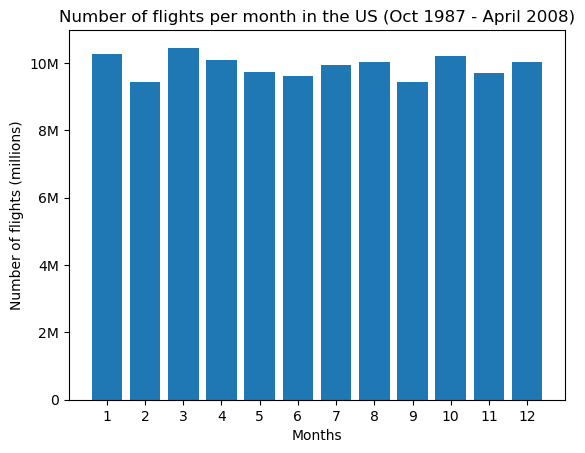

In [24]:
plt.bar(flights_monthly.month, flights_monthly.num_flights)
plt.title('Number of flights per month in the US (Oct 1987 - April 2008)')
plt.xlabel('Months')
plt.ylabel('Number of flights (millions)')
plt.xticks(flights_monthly.month)
plt.yticks([0.0, 2000000, 4000000, 6000000, 8000000, 10000000], ['0', '2M', '4M', '6M', '8M', '10M']);

#### Weekly mumber of flights

In [25]:
query = """
    SELECT day_of_week week, COUNT(*) num_flights
    FROM flights
    GROUP BY day_of_week"""

flights_weekly = query_to_df(query)

Total Run Time: 1 minutes


In [26]:
flights_weekly

,week,num_flights
0,1,17447894
1,2,17388831
2,3,17429117
3,4,17401407
4,5,17406738
5,6,15345943
6,7,16494528


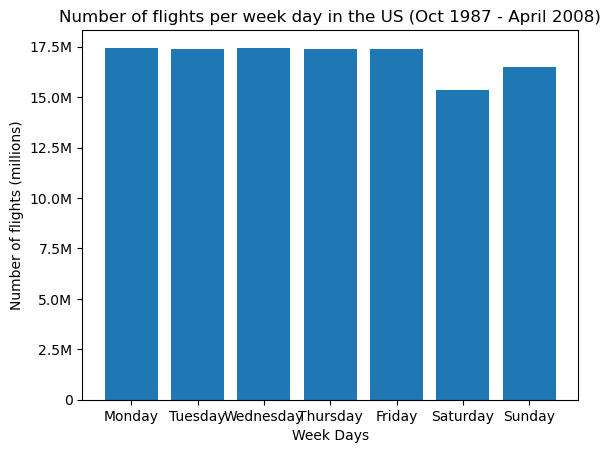

In [27]:
plt.bar(flights_weekly.week, flights_weekly.num_flights)
plt.title('Number of flights per week day in the US (Oct 1987 - April 2008)')
plt.xlabel('Week Days', fontsize=10)
plt.ylabel('Number of flights (millions)')
plt.xticks(flights_weekly.week, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
plt.yticks([0.0, 2500000, 5000000, 7500000, 10000000, 12500000, 15000000, 17500000], ['0', '2.5M', '5.0M', '7.5M', '10.0M', '12.5M', '15.0M', '17.5M']);

The number of flights every other weekday except Saturday and Sunday are almost the same, which is understandable because Saturday and Sunday are not work days.

#### Number of flight delays per year

In [28]:
query = """
    SELECT year, COUNT(*) num_flights
    FROM flights
    WHERE arr_delay IS NOT NULL and arr_delay >= 15
    GROUP BY year"""

yearly_flight_delay = query_to_df(query)

Total Run Time: 1 minutes


In [29]:
yearly_flight_delay

,year,num_flights
0,1987,312770
1,1988,977853
2,1989,1119466
3,1990,1019363
4,1991,833978
5,1992,838347
6,1993,861259
7,1994,881408
8,1995,1039250
9,1996,1220045


In [30]:
yearly_flight_delay = yearly_flight_delay.set_index('year')

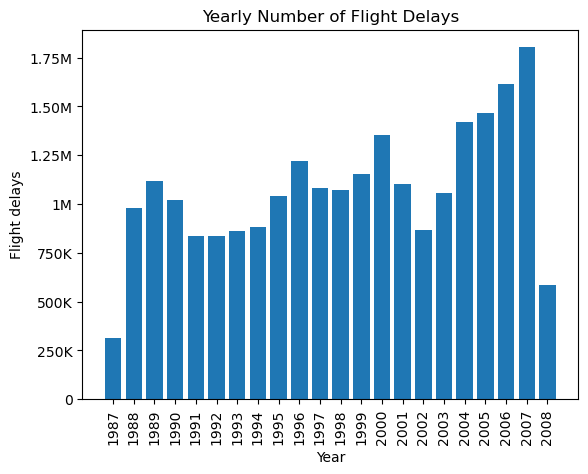

In [31]:
plt.bar(yearly_flight_delay.index, yearly_flight_delay.num_flights)
plt.title('Yearly Number of Flight Delays')
plt.xlabel('Year')
plt.ylabel('Flight delays')
plt.xticks(yearly_flight_delay.index, rotation=90);
plt.yticks([0.0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000], ['0', '250K', '500K', '750K', '1M', '1.25M', '1.50M', '1.75M']);

In [32]:
query = """
    SELECT year, AVG(arr_delay) avg_delay_mins
    FROM flights
    WHERE arr_delay IS NOT NULL and arr_delay >= 15
    GROUP BY year"""

yearly_avg_delay = query_to_df(query)

Total Run Time: 1 minutes


In [33]:
yearly_avg_delay

,year,avg_delay_mins
0,1987,37.956083
1,1988,38.610970
2,1989,39.979209
3,1990,40.930581
4,1991,38.764437
5,1992,37.626841
6,1993,39.571245
7,1994,40.896091
8,1995,42.681277
9,1996,46.198831


In [34]:
yearly_avg_delay = yearly_avg_delay.set_index('year')

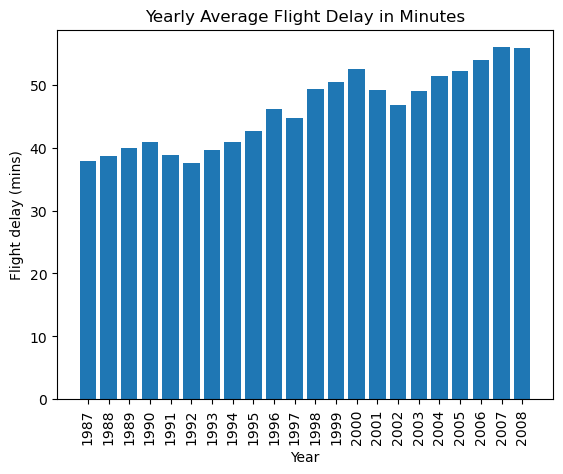

In [35]:
plt.bar(yearly_avg_delay.index, yearly_avg_delay.avg_delay_mins)
plt.title('Yearly Average Flight Delay in Minutes')
plt.xlabel('Year')
plt.ylabel('Flight delay (mins)')
plt.xticks(yearly_avg_delay.index, rotation=90);

Although, the 1987 and 2008 data does not cover the entire year, it appears the average delay in minutes has been increasing steadily.

Next let's see if there are months with higher average delays in minutes.

#### Monthly average flight delays in minutes

In [36]:
query = """
    SELECT month, AVG(arr_delay) avg_delay_mins
    FROM flights
    WHERE arr_delay IS NOT NULL and arr_delay >= 15
    GROUP BY month"""

monthly_avg_delay = query_to_df(query)

Total Run Time: 1 minutes


In [37]:
monthly_avg_delay = monthly_avg_delay.set_index('month')

In [38]:
monthly_avg_delay

,avg_delay_mins
month,
1,47.817883
2,47.019245
3,46.792182
4,45.720421
5,46.706697
6,51.043475
7,51.139322
8,48.481173
9,44.669885


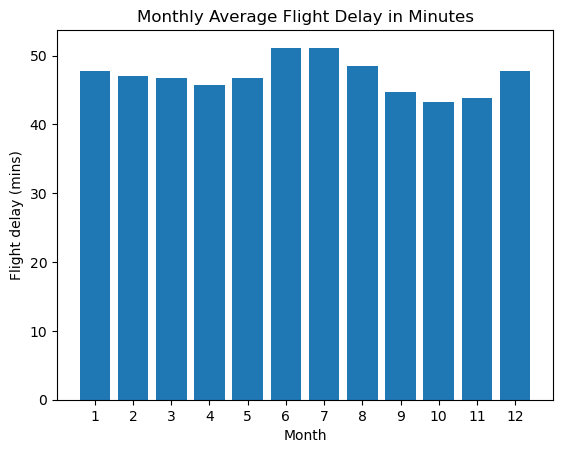

In [39]:
plt.bar(monthly_avg_delay.index, monthly_avg_delay.avg_delay_mins)
plt.title('Monthly Average Flight Delay in Minutes')
plt.xlabel('Month')
plt.ylabel('Flight delay (mins)')
plt.xticks(monthly_avg_delay.index);

The flight delay in minutes appears to be higher around June and July.

Next let's see the Average flight delay in minutes per day of week.

#### Day of week average flight delays in minutes

In [40]:
query = """
    SELECT day_of_week, AVG(arr_delay) avg_delay_mins
    FROM flights
    WHERE arr_delay IS NOT NULL and arr_delay >= 15
    GROUP BY day_of_week"""

weekly_avg_delay = query_to_df(query)

Total Run Time: 1 minutes


In [41]:
weekly_avg_delay = weekly_avg_delay.set_index('day_of_week')

In [42]:
weekly_avg_delay

,avg_delay_mins
day_of_week,
1,47.512648
2,46.125341
3,46.921264
4,48.015256
5,48.533426
6,45.222279
7,47.289274


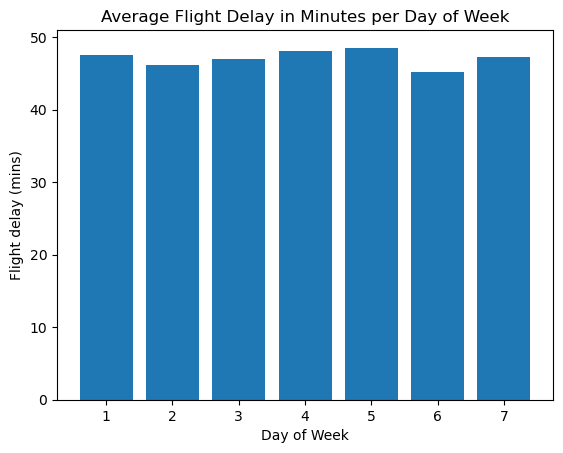

In [43]:
plt.bar(weekly_avg_delay.index, weekly_avg_delay.avg_delay_mins)
plt.title('Average Flight Delay in Minutes per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Flight delay (mins)')
plt.xticks(weekly_avg_delay.index);

#### Number of Flights per Airline

In [44]:
query = """
    SELECT unique_carrier, 
        COUNT(*) num_flights 
    FROM flights 
    GROUP BY unique_carrier
    ORDER BY num_flights DESC"""

airlines = query_to_df(query)

Total Run Time: 1 minutes


In [45]:
airlines.head()

,unique_carrier,num_flights
0,DL,16247348
1,WN,15173234
2,AA,14584281
3,US,13775480
4,UA,13004338


In [46]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   unique_carrier  29 non-null     object
 1   num_flights     29 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 592.0+ bytes


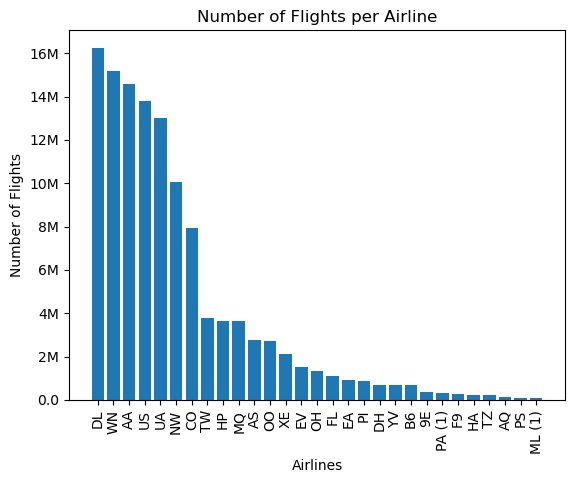

In [47]:
plt.bar(airlines.unique_carrier, airlines.num_flights)
plt.title('Number of Flights per Airline')
plt.xlabel('Airlines')
plt.ylabel('Number of Flights')
plt.xticks(airlines.unique_carrier, rotation=90)
plt.yticks([0.0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000], ['0.0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M']);

In [48]:
busiest_airlines = airlines.head(5)
busiest_airlines.unique_carrier.values

array(['DL', 'WN', 'AA', 'US', 'UA'], dtype=object)

In [49]:
query = """
    SELECT * 
    FROM carriers 
    WHERE code in ('DL', 'WN', 'AA', 'US', 'UA')"""

airline_names = query_to_df(query)

Total Run Time: 0 minutes


In [50]:
airline_names

,id,code,description
0,101,AA,American Airlines Inc.
1,442,DL,Delta Air Lines Inc.
2,1298,UA,United Air Lines Inc.
3,1309,US,US Airways Inc. (Merged with America West 9/05...
4,1389,WN,Southwest Airlines Co.


Delta Air Lines, Southwest Airlines, Ammerican Airlines, US Airways and United Air Lines are the busiest airlines.

Next we will look at the worst airlines

#### What is the Worst Airlines

In [51]:
query = """
    SELECT unique_carrier, 
        COUNT(*) num_delayed_flights, 
        ROUND(AVG(arr_delay), 2) avg_delay_mins
    FROM flights
    WHERE arr_delay >= 15
    GROUP BY unique_carrier"""

worst_airlines = query_to_df(query)

Total Run Time: 1 minutes


In [52]:
worst_airlines.head()

,unique_carrier,num_delayed_flights,avg_delay_mins
0,9E,73756,59.33
1,AA,2857582,50.55
2,AQ,14274,37.37
3,AS,613429,43.31
4,B6,166894,59.06


In [53]:
# To compute the percentage of delayed flights for each airline we will merge the airline dataframe with the worst airlines dataframe
worst_airlines = worst_airlines.merge(airlines)

In [54]:
worst_airlines.head()

,unique_carrier,num_delayed_flights,avg_delay_mins,num_flights
0,9E,73756,59.33,347210
1,AA,2857582,50.55,14584281
2,AQ,14274,37.37,154381
3,AS,613429,43.31,2776804
4,B6,166894,59.06,682728


In [55]:
worst_airlines['percentage_delay'] = worst_airlines.num_delayed_flights / worst_airlines.num_flights * 100

In [56]:
worst_airlines.head()

,unique_carrier,num_delayed_flights,avg_delay_mins,num_flights,percentage_delay
0,9E,73756,59.33,347210,21.242476
1,AA,2857582,50.55,14584281,19.593575
2,AQ,14274,37.37,154381,9.245956
3,AS,613429,43.31,2776804,22.091188
4,B6,166894,59.06,682728,24.445167


In [57]:
worst_airlines = worst_airlines.sort_values(by='percentage_delay', ascending=False)

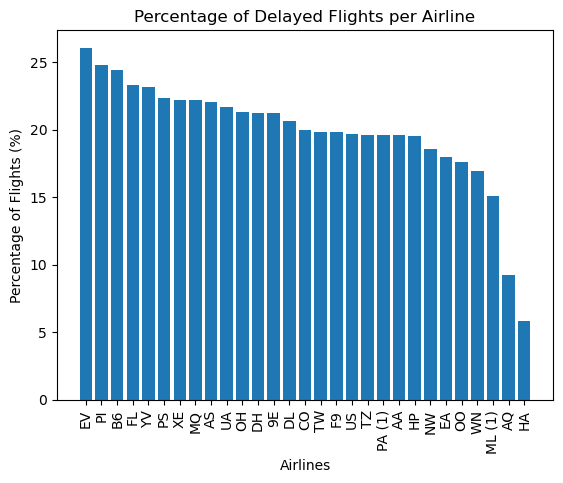

In [58]:
plt.bar(worst_airlines.unique_carrier, worst_airlines.percentage_delay)
plt.title('Percentage of Delayed Flights per Airline')
plt.xlabel('Airlines')
plt.ylabel('Percentage of Flights (%)')
plt.xticks(worst_airlines.unique_carrier, rotation=90);

There is 1/4 chance that your flights will be delayed Atlantic Southeast Airlines (EV).

#### Number of Flights Per Airport

In [59]:
query = """
    SELECT origin, 
        COUNT(*) num_flights 
    FROM flights 
    GROUP BY origin
    ORDER BY num_flights DESC"""

airports = query_to_df(query)

Total Run Time: 1 minutes


In [60]:
airports.head()

,origin,num_flights
0,ORD,6365070
1,ATL,5823454
2,DFW,5522740
3,LAX,3946884
4,PHX,3361073


In [61]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   origin       346 non-null    object
 1   num_flights  346 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.5+ KB


In [62]:
airports.describe()

,num_flights
count,3.460000e+02
mean,3.436834e+05
std,8.191089e+05
min,1.000000e+00
25%,7.359750e+03
50%,3.466000e+04
75%,1.880608e+05
max,6.365070e+06


In [63]:
top_10_airports = airports.head(10)

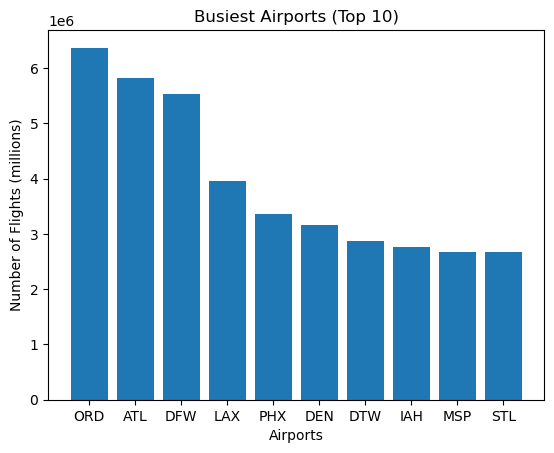

In [64]:
plt.bar(top_10_airports.origin, top_10_airports.num_flights)
plt.title('Busiest Airports (Top 10)')
plt.xlabel('Airports')
plt.ylabel('Number of Flights (millions)');

**Observation**: The above graph shows that ORD, ATL DFW, LAX and PHX are the busiest airport in the US.

Next let's see the airport with highest proportion of flight delays.

#### What is the Wosrt Airport

In [65]:
query = """
    SELECT origin, 
        COUNT(*) num_delayed_flights, 
        ROUND(AVG(dep_delay), 2) avg_delay_mins
    FROM flights
    WHERE dep_delay >= 15
    GROUP BY origin"""

worst_airports = query_to_df(query)

Total Run Time: 1 minutes


In [66]:
worst_airports.head()

,origin,num_delayed_flights,avg_delay_mins
0,ABE,13332,82.11
1,ABI,1946,68.16
2,ABQ,106314,43.36
3,ABY,1358,55.38
4,ACK,409,84.14


In [67]:
# To compute the percentage of delayed flights for each airport we will merge the airport dataframe with the worst airport dataframe
worst_airports = worst_airports.merge(airports)

In [68]:
worst_airports.head()

,origin,num_delayed_flights,avg_delay_mins,num_flights
0,ABE,13332,82.11,119778
1,ABI,1946,68.16,19935
2,ABQ,106314,43.36,732747
3,ABY,1358,55.38,7358
4,ACK,409,84.14,1355


In [69]:
worst_airports['percentage_delay'] = worst_airports.num_delayed_flights / worst_airports.num_flights * 100

In [70]:
worst_airports.head()

,origin,num_delayed_flights,avg_delay_mins,num_flights,percentage_delay
0,ABE,13332,82.11,119778,11.130592
1,ABI,1946,68.16,19935,9.761726
2,ABQ,106314,43.36,732747,14.508964
3,ABY,1358,55.38,7358,18.456102
4,ACK,409,84.14,1355,30.184502


In [71]:
worst_airports = worst_airports.sort_values(by='percentage_delay', ascending=False)

In [72]:
worst_airports.head(10)

,origin,num_delayed_flights,avg_delay_mins,num_flights,percentage_delay
29,BFI,1,28.00,1,100.000000
117,FMN,3,203.67,3,100.000000
251,PIR,5,53.40,5,100.000000
81,CYS,2,145.00,2,100.000000
28,BFF,1,131.00,1,100.000000
231,OGD,5,172.40,6,83.333333
65,CKB,4,52.75,8,50.000000
8,ADK,224,63.45,521,42.994242
304,SOP,120,67.03,319,37.617555
4,ACK,409,84.14,1355,30.184502


In [73]:
worst_20 = worst_airports.head(20)

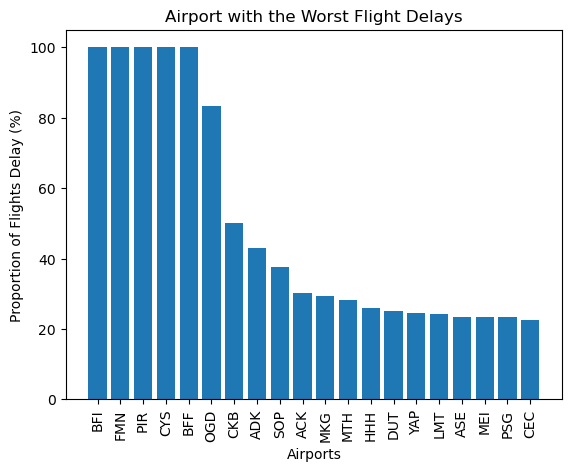

In [74]:
plt.bar(worst_20.origin, worst_20.percentage_delay)
plt.title('Airport with the Worst Flight Delays')
plt.xlabel('Airports')
plt.ylabel('Proportion of Flights Delay (%)')
plt.xticks(worst_20.origin, rotation=90);

**Observation**: Most of the airports with the worst delays are used majorly by cargo airlines and general aviation aircraft. However, our dataset only reported commercial flights [source](https://en.wikipedia.org/wiki/Boeing_Field).

Going forward in our exploration we will only focus on flight delays originating from the top 5 airports and the top 5 airlines operating from those airports.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Flight delay (arr_delay) and Airport delay (dep_delay) variables were unimodal and spread across a wide range of minutes between -1500 and 2500 minutes with most of the data centered between -50 and 50 minutes. I applied a log transform on the y-axis to show data on both sides of the peak.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

All the features investigated where already tidy, I had to clean the data by selecting only non-null values in my SQL queries hence there were no missing values in the dataframes.

## Bivariate Exploration

In this section, I will look at the relationship between: 

1. Flight and Airport delays
2. Flight delay and Airports

Furthermore, we will look at the delay trends across:
1. The top 5 Airports


We will focus only flight originating from the top 5 busiest airports:
1. ORD: Chicago O'Hare International
2. ATL: William B Hartsfield-Atlanta Intl
3. DFW: Dallas-Fort Worth International 
4. LAX: Los Angeles International
5. PHX: Phoenix Sky Harbor International

#### Relationship Between Airline and Airport Delays

In [75]:
query = """
    SELECT dep_delay, arr_delay 
    FROM flights
    WHERE dep_delay >= 15 AND
        arr_delay >= 15 AND
        dep_delay IS NOT NULL AND
        arr_delay IS NOT NULL
    """

delays = query_to_df(query, optimize=True)

Memory usage before optimization 0.35 GB
Memory usage after optimization 0.17 GB
Total Run Time: 1 minutes


In [76]:
delays.head()

,dep_delay,arr_delay
0,19,33
1,16,24
2,21,34
3,87,88
4,19,23


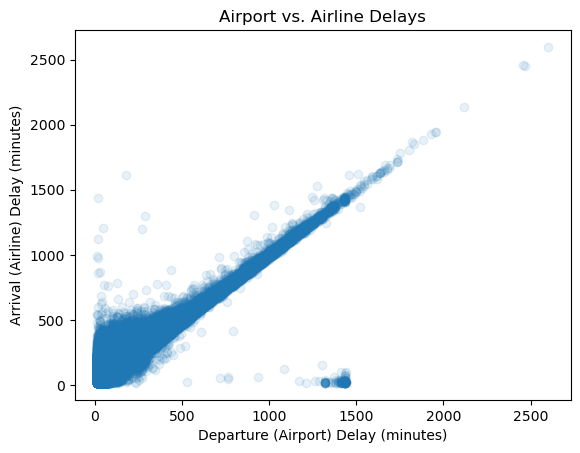

In [77]:
plt.scatter(data=delays, x='dep_delay', y='arr_delay', alpha=0.1);
plt.title('Airport vs. Airline Delays')
plt.xlabel('Departure (Airport) Delay (minutes)')
plt.ylabel('Arrival (Airline) Delay (minutes)');

This plot suggests there is strong positive relationship between departure and arrival delays, which makes logical sense because a flight that departed late will potential arrival late. Suprisingly, there are flights that departed late and arrived on-time, which are clustered around 1440 minutes. Investigating this further show that flights that were delayed for around 24 hours arrival the next day at about the same time as scheduled.

Next, we will look at the relationship between airlines and flight delays.

#### Relationship between Flight delays and Airports

In [78]:
query = """
    SELECT id,
        origin, 
        unique_carrier, 
        date, 
        dep_delay,
        arr_delay
    FROM flights
    WHERE dep_delay >= 15 AND
        arr_delay >= 15 AND
        dep_delay IS NOT NULL AND
        arr_delay IS NOT NULL AND
        origin in ('ORD', 'ATL', 'DFW', 'LAX', 'PHX')
    """

airport_delays = query_to_df(query, optimize=True)

Memory usage before optimization 0.74 GB
Memory usage after optimization 0.28 GB
Total Run Time: 1 minutes


In [79]:
airport_delays.head()

,id,origin,unique_carrier,date,dep_delay,arr_delay
0,96,LAX,PS,1987-10-1,21,31
1,105,LAX,PS,1987-10-20,22,20
2,143,LAX,PS,1987-10-6,28,32
3,156,LAX,PS,1987-10-23,15,36
4,335,LAX,PS,1987-10-4,25,41


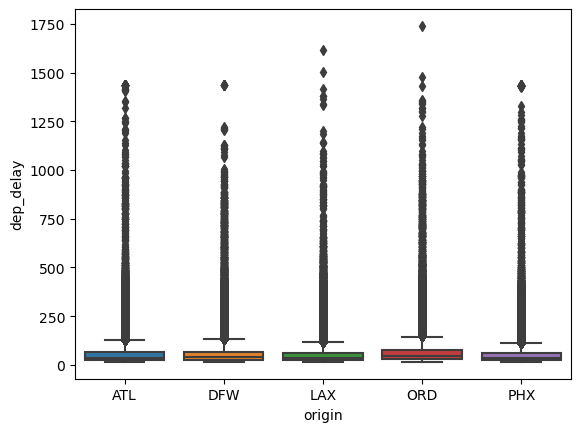

In [80]:
sns.boxplot(data=airport_delays, x='origin', y='dep_delay');

The median flight delay at the Chicago O'Hare International airport appears to be the highest across the top 5 airports.

In [81]:
airport_delays['date'] = pd.to_datetime(airport_delays['date'])

In [82]:
airport_delays = airport_delays.set_index('date')

In [83]:
airport_delays.head()

,id,origin,unique_carrier,dep_delay,arr_delay
date,,,,,
1987-10-01,96,LAX,PS,21,31
1987-10-20,105,LAX,PS,22,20
1987-10-06,143,LAX,PS,28,32
1987-10-23,156,LAX,PS,15,36
1987-10-04,335,LAX,PS,25,41


In [84]:
delay_means = airport_delays.groupby('date').count()['dep_delay'].rolling(window=365).mean()

In [85]:
delay_means

date
1987-10-01           NaN
1987-10-02           NaN
1987-10-03           NaN
1987-10-04           NaN
1987-10-05           NaN
                 ...    
2008-04-26    890.484932
2008-04-27    890.997260
2008-04-28    892.561644
2008-04-29    892.183562
2008-04-30    891.682192
Name: dep_delay, Length: 7517, dtype: float64

Text(0, 0.5, 'Number of Delayed Flights')

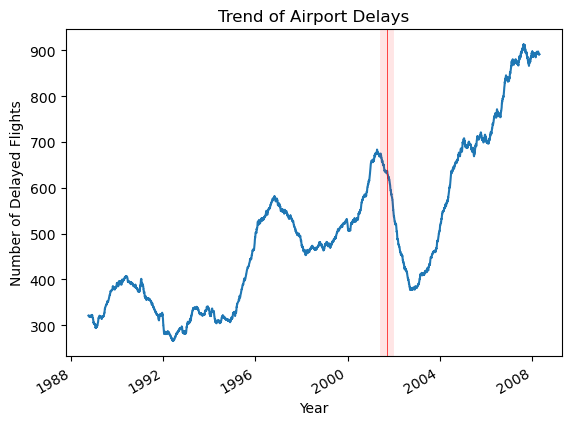

In [86]:
delay_means.plot()
plt.axvline('2001-09-11', linewidth=0.5, color='red')
plt.axvline('2001-09-11', linewidth=10, color='red', alpha=.1);
plt.title('Trend of Airport Delays')
plt.xlabel('Year')
plt.ylabel('Number of Delayed Flights')

In [87]:
ord = airport_delays.groupby(['origin','date']).count()['arr_delay']['ORD'].rolling(365).mean()
atl = airport_delays.groupby(['origin','date']).count()['arr_delay']['ATL'].rolling(365).mean()
dfw = airport_delays.groupby(['origin','date']).count()['arr_delay']['DFW'].rolling(365).mean()
lax = airport_delays.groupby(['origin','date']).count()['arr_delay']['LAX'].rolling(365).mean()
phx = airport_delays.groupby(['origin','date']).count()['arr_delay']['PHX'].rolling(365).mean()

In [88]:
ord

date
1987-10-01           NaN
1987-10-02           NaN
1987-10-03           NaN
1987-10-04           NaN
1987-10-05           NaN
                 ...    
2008-04-26    253.564384
2008-04-27    253.739726
2008-04-28    254.693151
2008-04-29    254.550685
2008-04-30    254.301370
Name: arr_delay, Length: 7517, dtype: float64

In [89]:
ticks = [ '{}-01-01'.format(year) for year in range(1988, 2009)]

plt.figure(figsize=(15, 10))
ord.plot(label='Chicago O\'Hare International (ORD)')
atl.plot(label='William B Hartsfield-Atlanta Intl {ATL}')
dfw.plot(label='Dallas-Fort Worth International (DFW)')
lax.plot(label='Los Angeles International (LAX)')
phx.plot(label='Phoenix Sky Harbor International (PHX)')
plt.legend(fontsize=8)
plt.axvline('2001-09-11', linewidth=0.5, color='red')
plt.axvline('2001-09-11', linewidth=10, color='red', alpha=.1);
plt.xticks(ticks, [tick[:4] for tick in ticks]);

plt.title('Trend of Airport Across the Top 5 Airports')
plt.xlabel('Year')
plt.ylabel('Number of Delayed Flights');

Generally, the delay trend across airport following a similar pattern. Notably, the delay trend dropped substantially after the 9/11 attacks. Possibly, this may be due to drop in the number of flights in 2002, which led to improved on-time performance. However, the trend resumed again at the beginning of 2003.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Arrival delays has a strong positive correlation with departure delays. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No other relationship was observed

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

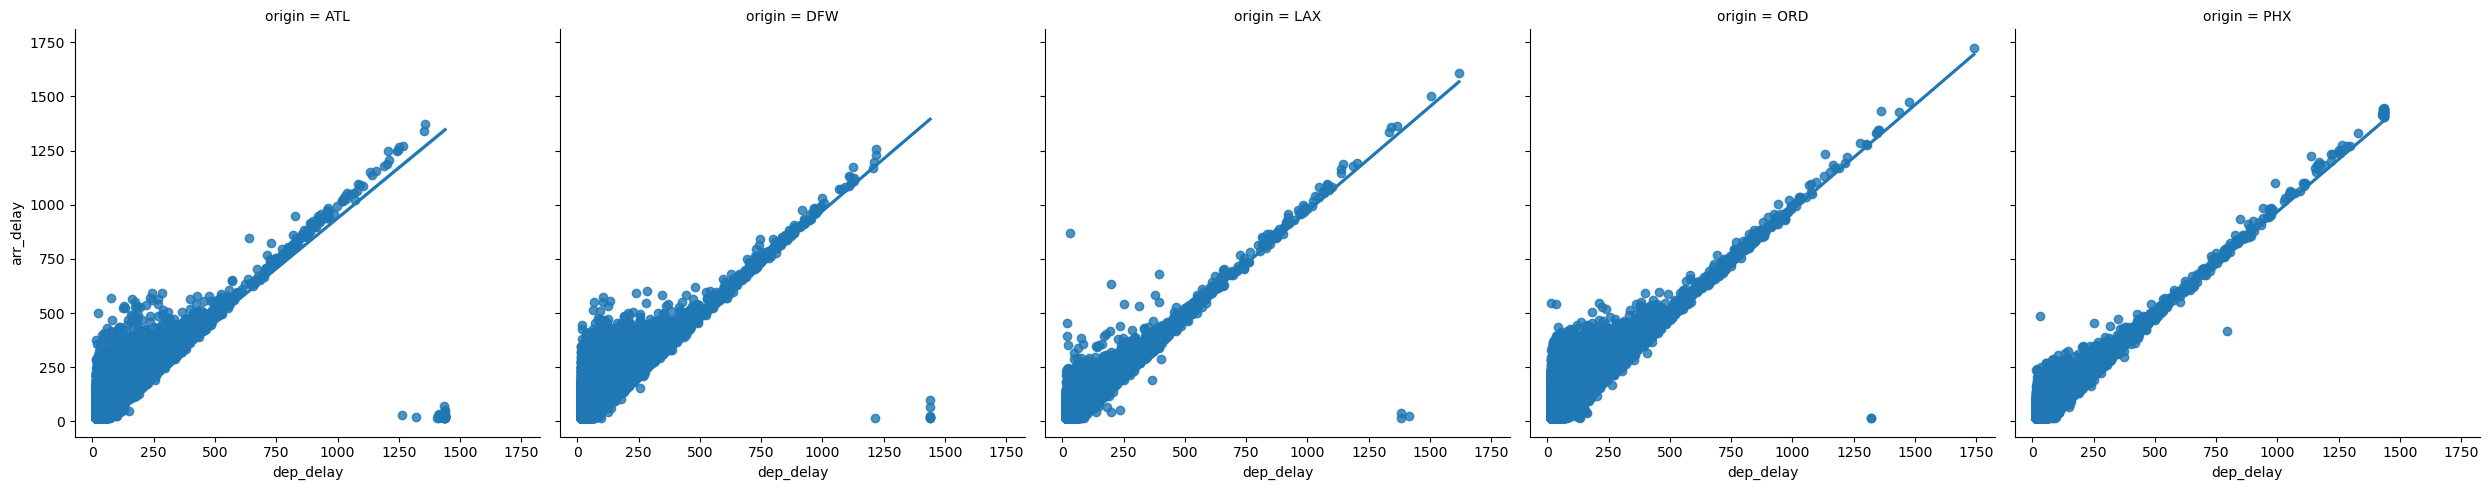

In [91]:
sns.lmplot(data=airport_delays, 
           x='dep_delay', y='arr_delay', col='origin');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There appears to be a strongly positive relationship between arrival and departuren delay across the top 5 airports.

### Were there any interesting or surprising interactions between features?

None

## Conclusions

Flight delays are strongly and positively correlated with airport delays. Furthermore, the trend of flight delays have been increasingly steadily over the year, this could be due to the increase in the number of flights generally. 
